In [1]:
from __future__ import unicode_literals, print_function, division
from io import open

import string
import re
import random
import numpy as np
import os

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F


from word2vector import Vocab
from EncoderRNN import EncoderRNN
from Attention import Attn
from DecoderRNN import DecoderRNN
import Data_reading
from Pretrained_embedding import pre_embedding
import Train


device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
print(device)

cuda:3


In [2]:
Glove = pre_embedding('glove')
Glove.init()

In [3]:
src_train, src_train_lens, tgt_train, src_val, src_val_lens, tgt_val = Data_reading.input_data(Glove)

src_train (99558, 30)
src_train_lens (99558,)
tgt_train (99558, 30)
src_val (5000, 30)
src_val_lens (5000,)
tgt_val (5000, 30)


In [4]:
src_train_tensors = torch.LongTensor(src_train).to(device)
src_train_lens_tensors = torch.LongTensor(src_train_lens).to(device)
tgt_train_tensors = torch.LongTensor(tgt_train).to(device)

src_val_tensors = torch.LongTensor(src_val).to(device)
src_val_lens_tensors = torch.LongTensor(src_val_lens).to(device)
tgt_val_tensors = torch.LongTensor(tgt_val).to(device)

embedding = torch.FloatTensor(Glove.embedding).to(device)

In [5]:
print(type(embedding))
print(type(src_train_tensors))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [6]:
embedding_dim = 300
num_layer = 1
dropout = 0.1
hidden_dim = 128
batch_size = 32
vocab_size = len(Glove.word2index)
#embedding=None

encoder = EncoderRNN(input_vocab_size=vocab_size, embedding_dim=embedding_dim, hidden_dim=hidden_dim,
                     num_layer=num_layer, dropout=dropout, embedding=embedding).to(device)

attn = Attn('general', hidden_dim).to(device)

decoder = DecoderRNN(attn_model=attn, output_vocab_size=vocab_size, embedding_dim=embedding_dim, 
                     hidden_dim=hidden_dim, num_layer=num_layer, dropout=dropout,embedding=embedding).to(device)


/home/sun.y/.conda/envs/yusen/lib/python3.7/site-packages/torch/nn/modules/rnn.py:54: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [7]:
Train.train(src_train_tensors, src_train_lens_tensors, tgt_train_tensors, 
            src_val_tensors, src_val_lens_tensors, tgt_val_tensors, 
            encoder, decoder, 
            epoches=20, batch_size=32, print_every=1, plot_every=1, learning_rate=0.001)

iter 1
32/99558, loss:12.731327056884766

RuntimeError: CUDA out of memory. Tried to allocate 1.29 GiB (GPU 3; 10.92 GiB total capacity; 8.34 GiB already allocated; 181.50 MiB free; 1.86 GiB cached)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def showPlot(points, points2):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points, label = 'train loss')
    plt.plot(points2, label = 'val loss')
    plt.legend()

    

In [ ]:
train = [0, 1, 2, 3, 4, 5, 6]
val = [-1, 0, 1, 2, 3, 4, 5]

<Figure size 432x288 with 0 Axes>

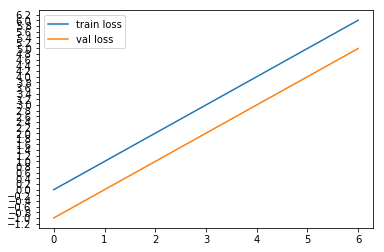

In [27]:
showPlot(train, val)

In [ ]:
from torchviz import make_dot, make_dot_from_trace

# batch = [0,1,2,3]

input_tensors = torch.LongTensor(np.array([tensorsFromPair(pairs[i])[0] for i in batch], dtype=int)).to(device)
target_tensors = torch.LongTensor(np.array([tensorsFromPair(pairs[i])[1] for i in batch], dtype=int)).to(device)
input_lengths = torch.LongTensor(np.array([tensorsFromPair(pairs[i])[2] for i in batch],  dtype=int)).to(device)

input_lengths, indices = torch.sort(input_lengths, descending=True)
input_tensors = input_tensors[indices,:]
target_tensors = target_tensors[indices,:]

input_tensors = input_tensors.t()
#target_tensors = target_tensors.t()

y = encoder.forward(input_tensors, input_lengths)

make_dot(y)#, params=dict(encoder.named_parameters()))

In [ ]:
encoder_outputs, h, c = encoder.forward(input_tensors, input_lengths)
    
decoder_init_word = torch.ones(1, len(batch), device=device).long()

g = decoder.forward(decoder_init_word, h, c, encoder_outputs)

make_dot(g)#, params=dict(decoder.named_parameters()))

In [ ]:
for i in list(encoder.parameters()):
    print(i.size())

In [1]:
for i in list(decoder.parameters()):
    print(i.size())

NameError: name 'decoder' is not defined

In [2]:
rnn = '/home/sun.y/OpenNMT-py/data/rnn_model_120000.pt'

In [4]:
model = torch.load(rnn)
